### periodic forced pendulum mapping at a period

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import odeint
import mpmath as mpmath

# %matplotlib notebook 
%matplotlib inline 

Modifying kinetic energy so that we have a periodic system in $p$. 

Our Hamiltonian 
\begin{align}
 H(\phi,p,t) = a(1- \cos p) - \epsilon \cos(\phi) - \mu \cos(\phi - \nu t) - \mu' \cos(\phi + \nu t)
 \end{align}
$$ {\bf y} = [\phi,p]$$
Hamilton's equations give 
\begin{align}
 d{\bf y}/dt &= [\dot \phi, \dot p]  = [\partial_p H, -\partial_\phi H] \\
      & = [a\sin p, -\epsilon \sin(\phi) - \mu \sin(\phi - \nu t) - \mu' \sin(\phi + \nu t)] 
\end{align}
       


In [1]:
# routines for classical system integration 

# set up equations of motion
# y = [phi,p]  dimension 2
# H(phi,p,t) = a(1 - cos p) - epsilon*cos phi - mu*cos(phi - nu t) - mup*cos(phi + nu t)
# dy/dt = [\dot phi, \dot p]
#       = [\sin p, -epsilon*sin(phi) - mu*sin(phi - nu*t) - - mup*sin(phi + nu*t) ]
#There should be three islands, one at p=0 and the others at p=+-nu
#the widths of these are set by \sqrt{2 epsilon}, \sqrt{2 mu},  \sqrt{2 mup}


# dy/dt = func(y,t), needed for integrator!
# note that y[0] = phi and y[1] = p
def func(y,t,a,epsilon,mu,mup,nu):
        return [a*np.sin(y[1]),\
                -epsilon*np.sin(y[0]) - mu*np.sin(y[0] - nu*t) - mup*np.sin(y[0] + nu*t)]

def H_classical(p,phi,t,a,epsilon,mu,mup,nu):
    #phi = y[0]; p = y[1]
    return a*(1.0 - np.cos(p)) - epsilon*np.cos(phi)\
        - mu*np.cos(phi-nu*t) - mup*np.cos(phi+nu*t)


In [4]:
# integrate at a period, the forced pendulum 
# arguments:
#   y0 is initial conditions, 
#   npoints is number of points we want
#   a,epsilon, mu, mup, nu are parameters of the Hamiltonian model
#
#   integrate every period, npoints returned including initial condition 
# returns: phi,p arrays of integrated points 
# this particular routin does all times at once by sending a set of times to the integrator
# if we want to take p modulo 2pi we would have to integrate slowly to find when trajectories
# cross pi or -pi
twopi = 2.0*np.pi
def givepoints_arr(y0,npoints,a,epsilon,mu,mup, nu):
    # set up time array, every 2pi/nu so for period of perturbation
    step  = 2.0*np.pi/nu
    stop = step*npoints
    time  = np.arange(0.0,stop,step)  # time array for outputs  goes from 0 to stop-step 
    #                              with increment step, does not reach stop. 
    # do the integration
    y = odeint(func, y0, time, args=(a,epsilon,mu,mup,nu))
    #y2 = odeint(func, y0, time, Dfun=jacobian, args=(epsilon,mu,nu))  # if you want to use a jacobian
    phi_arr = np.squeeze(y[:,0])  # is an array of phi at different times
    p_arr = np.squeeze(y[:,1])    # is an array of momenta at different times
    
    phi_arr  = phi_arr%twopi  # so that phi in [0:2pi]
    p_arr = p_arr%twopi  # so that p is in [0,2pi]
    
    ii = phi_arr >np.pi
    phi_arr[ii]-= twopi # now phi is in [-pi,pi]
    ii = p_arr >np.pi
    p_arr[ii]-= twopi   # now p is in [-pi,pi]
    
    return phi_arr,p_arr 
       
# integrate points and plot them on axis    ax   
def givepoints(y0,npoints,a,epsilon,mu,mup,nu,marker,ax):
    phi_arr,p_arr=givepoints_arr(y0,npoints,a,epsilon,mu,mup,nu)
    ax.plot(phi_arr,p_arr,marker,markersize=0.5) # plot it
    
colorlist = ['black','blue','green','magenta','red','orange','gold','blueviolet','springgreen']

# randomly choose an initial condition, integrate and plot in axis ax 
# arguments:
#    npoints: numbers of points to plot 
#    pmin, pmax constrain the vertical width of randomly chosen initial conditions 
#    epsilon,mu,mup,nu: parameters for the dynamical model 
#    ax  the axis on which to plot points 
def rand_give_points(npoints,a,epsilon,mu,mup,nu,pmin,pmax,ax):
    phi = np.random.uniform(low=-np.pi,high=np.pi)
    p = np.random.uniform(low=pmin,high=pmax)
    y0 = [phi,p]
    phi_arr,p_arr=givepoints_arr(y0,npoints,a,epsilon,mu,mup,nu)
    i = np.random.randint(low=0,high =len(colorlist))
    ax.scatter(phi_arr,p_arr,s=1,edgecolor='none',facecolor=colorlist[i],lw=1)

# make a figure with norb orbits 
def mkfig(norb,npoints,a,epsilon,mu,mup,nu,ofile):
    # set up display
    fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=200) 
    plt.subplots_adjust(bottom=0.18,top=0.90,left=0.18,right=0.98)
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel('p')
    ax.set_aspect('equal')

    fac=1.01
    xmax = np.pi;  ymax = np.pi;  ymin = -ymax
    ax.set_xlim([-xmax*fac,xmax*fac])
    ax.set_ylim([ ymin*fac,ymax*fac])

    parm_label = r'$a$={:.1f},'.format(a)
    parm_label += r'$\epsilon$={:.2f},'.format(epsilon)
    parm_label += r'$\mu$={:.2f},'.format(mu)
    muprime = r'$\mu$' + '\''
    parm_label += muprime
    parm_label += r'={:.2f},'.format(mup)
    parm_label += r'$\nu$={:.0f}'.format(nu)
    ax.text(0,3.4,parm_label,ha='center',va='center')

    for i in range(norb):  # this many orbits 
        rand_give_points(npoints,a,epsilon,mu,mup,nu,ymin,ymax,ax)
    if (len(ofile)>3):
        plt.savefig(ofile)

    

In [4]:
# choose parameters
a=1.; nu=1.0  
epsilon=1.
mu=0.0; mup=mu
npoints=500 # points in each orbit!
norb = 100  # number of orbits

ofile = ''
mkfig(norb,npoints,a,epsilon,mu,mup,nu,ofile)


### discrete quantum phase space 

Let's make a displacement operator
$${\hat D} ( k,l) = \omega^{-kl/2} {\hat Z}^k {\hat  X}^l $$
with 
$$ \hat Z = \sum_{n} \omega^n |n\rangle \langle n|$$ 
$$ \hat X = \sum_n | n+1 \rangle \langle n | $$
where 
$$ \omega = e^{2 \pi i/N}$$ 

$\hat X$ generates displacement in the regular basis and so is like a momentum op?

$\hat Z$ generates displacement in the Fourier basis and so is like a position op?

If we index $k,l$  this would be $y,x$ for a n array as shown in imshow

A function that is a unimodal eigenfunction of the discrete Fourier transform with eigenvalue 1; 
$$|\tilde \eta\rangle = b \sum_{m=0}^{N-1}  \vartheta_3 \left( \frac{\pi m}{N}, e^{-\pi/N} \right)  
| m \rangle $$
where $\vartheta_3$ is a Jacobi function and $b$ serves to normalize the function. 
See 
https://en.wikipedia.org/wiki/Discrete_Fourier_transform 
which we can compute using https://mpmath.org/doc/current/functions/elliptic.html#jacobi-theta-functions


There is also a summation version
$$ |\tilde \eta \rangle \propto \sum_{m=0}^{N-1} \sum_{j=-\infty}^\infty e^{-\frac{\pi}{N} (m + jN)^2}|m\rangle $$
 

We define coherent states using the displacement operator and $|\tilde\eta \rangle $; 
$$ |k,l\rangle = {\hat D} (k,l)| {\tilde \eta} \rangle$$

Compute the Hussimi function of a state vector $|\psi \rangle $ as 
$$H(k,l) = |\langle \psi | k,l\rangle |^2$$


We define the QFT as 
\begin{align}
Q_{FT} = \frac{1}{\sqrt{N} } \sum_{mn} \omega^{mn} |m \rangle \langle n|
\end{align}
and the basis 
\begin{align}
|m\rangle_F = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}\omega^{jm} | j\rangle 
\end{align}

In [87]:
# routines for displacement operator, coherent states and Husimi distribution 

# return Xhat as a 2d NxN complex matrix (unitary)   
def Xhat_op(N): # in regular basis 
    X = np.zeros((N,N),dtype=complex)
    for k in range(N):
        X[(k+1)%N,k] = 1.0 + 0j
    return X

# return Zhat as a 2d NxN complex matrix (unitary)  
def Zhat_op(N):  # in regular basis
    Z = np.zeros((N,N),dtype=complex)
    for k in range(N):
        omegaj = np.exp(2*np.pi*k*1j/N)
        Z[k,k] = omegaj 
    return Z

# create Dhat, the displacement operator as a function of k,l  
# returns an NxN complex matrix, is unitary 
def Displacement_op(N,k,l):
    #D = np.zeros((N,N),dtype=complex)
    omega = np.exp(2*np.pi*1j/N)
    #omfac = np.power(-omega*k*l/2.0)
    X = Xhat_op(N)
    Z = Zhat_op(N)
    Xl = np.linalg.matrix_power(X, l)
    Zk = np.linalg.matrix_power(Z, k)
    Dhat= np.power(omega,-k*l/2.0) * np.matmul(Zk,Xl)
    return Dhat

# compute the eta function in two different ways (and I checked that they agree!)
# returns an N dimensional complex array (a normalized quantum state vector)
def eta_tilde_check(N):
    eta = np.zeros(N,dtype=complex)
    eta_b = np.zeros(N,dtype=complex)
    efac = np.exp(-np.pi/N)
    for m in range(N):
        eta[m] = np.real(mpmath.jtheta(3,np.pi*m/N,efac)/np.sqrt(N))
    for m in range(N):  #checking with a direct sum 
        for j in range(-2*N,2*N):
            eta_b[m] += np.exp(-np.pi/N*(m + j*N)**2)  
            # arbitrarily stopped at 2N, the sum should go to infinity 
    eta_mag = np.sqrt(np.sum(eta*np.conj(eta)))
    eta = eta/eta_mag # normalize
    eta_b_mag = np.sqrt(np.sum(eta_b*np.conj(eta_b)))
    eta_b = eta_b/eta_b_mag # normalize
    return eta,eta_b

# computes eigenfunction |\tilde eta> of the QFT 
# returns an N dimensional complex normalized statevector 
# This is a unimodal periodic thing which is peaked at index 0
def eta_tilde(N):
    eta = np.zeros(N,dtype=complex)
    efac = np.exp(-np.pi/N)
    for m in range(N):  # compute using theta function 
        eta[m] = np.real(mpmath.jtheta(3,np.pi*m/N,efac)/np.sqrt(N))
    eta_mag = np.sqrt(np.sum(eta*np.conj(eta)))
    eta = eta/eta_mag   # normalize
    return eta

# checking that eta = eta_b
#eta,eta_b = eta_tilde_check(30)
#plt.plot(eta,'ro',ms=1)
#plt.plot(eta_b,'bo',ms=5,alpha=0.2)

# check that second routine actually works
#eta =  eta_tilde(30)
#plt.plot(np.real(eta),'.')

#  Creat a coherent state from Displacement operator hat D and eigenfunction |tilde eta>
# returns an N dimensional complex normalized state vector 
def coherent_state(N,k,l):
    Dhat = Displacement_op(N,k,l)
    eta=eta_tilde(N)
    ch = np.matmul(Dhat,eta)
    return ch

# make a set of coherent states from QFT eigenfunction |tilde eta> and displacement op
# returns an N x N x N 3D complex array 
#   the matrix [k,l,:] is the coherent state |k,l>
def coh_Dkl(N):
    c_matrix = np.zeros((N,N,N),dtype=complex)
    eta=eta_tilde(N)  #only do this once
    omega = np.exp(2*np.pi*1j/N)  #only do this once
    #omfac = np.power(-omega*k*l/2.0)
    X = Xhat_op(N) # only do this once
    Z = Zhat_op(N) # only do this once
    for k in range(N):
        Zk = np.linalg.matrix_power(Z, k)
        for l in range(N):
            Xl = np.linalg.matrix_power(X, l)
            Dhat = np.power(omega,-k*l/2.0) * np.matmul(Zk,Xl)
            #Dhat = Displacement_op(N,k,l)
            c_matrix[k,l,:] = np.matmul(Dhat,eta)  
            # if displacement is in p direction then p increases with l
            # and k increases in x direction 
            # note that imshow displays arrays with [j,k] with j in y direction
    return c_matrix


# make a set of coherent states from QFT eigenfunction |tilde eta> and displacement op
# returns an N x N x N 3D complex array 
#   the matrix [k,l,:] is the coherent state |k,l>
#  a more efficient version 
def coh_Dkl_b(N):
    c_matrix = np.zeros((N,N,N),dtype=complex)
    eta=eta_tilde(N)  #only do this once
    omega = np.exp(2*np.pi*1j/N)  #only do this once
    #omfac = np.power(-omega*k*l/2.0)
    X = Xhat_op(N) # only do this once
    Z = Zhat_op(N) # only do this once
    Zk = np.linalg.matrix_power(Z, 0)
    for k in range(N):
        Xl = np.linalg.matrix_power(X, 0)
        for l in range(N):
            #Xl = np.linalg.matrix_power(X, l)
            Dhat = np.power(omega,-k*l/2.0) * np.matmul(Zk,Xl)
            #Dhat = Displacement_op(N,k,l)
            c_matrix[k,l,:] = np.matmul(Dhat,eta)  
            # if displacement is in p direction then p increases with l
            # and k increases in x direction 
            # note that imshow displays arrays with [j,k] with j in y direction
            Xl = np.matmul(X,Xl)
        Zk = np.matmul(Z,Zk)
    return c_matrix
   
# compute Hussimi distribution of an N dimensional state vector psi 
# in advance you have computed a set of coherent states with above
#    routine coh_Dkl(N) 
# the set of coherent states is given via the argument c_matrix 
#    c_matrix should be an NxNxN matrix 
# the routine returns an NxN real matrix which is the Hussimi function  
#   note that index order is p,x  so that y would be first index, as expected for plotting 
def Husimi(psi,c_matrix):
    N = len(psi)
    H_matrix = np.zeros((N,N))
    cshape = c_matrix.shape
    if (cshape[0] != N):
        print('c_matrix is wrong dimension')
    for k in range(N):
        for l in range(N):
            co_kl = np.squeeze(c_matrix[k,l,:])  #coherent state |k,l> x,p
            mag = np.vdot(psi,co_kl) # dot product
            mag = np.absolute(mag) # is real 
            H_matrix[k,l] = mag**2  
    #H_matrix = np.transpose(H_matrix)  # flipping index order here!!!!! so p,x
    return H_matrix

### units - classical


Suppose  we work with the kicked rotor.
The kinetic energy is $I \Omega^2/2 = L^2/(2I)$ where $I$ is a moment of inertia. 

Suppose we want a periodic setting.  Let the span of $L$ be $L_{span} = 2 \pi L_0$. 
In terms of a parameter $L_0$ 
$$
H(L,\phi,t) = \frac{L_0^2}{I} \frac{L^2}{2 L_0^2} - \epsilon \cos \phi 
$$
If $L$ is periodic in with period $L_{span}$ then we can approximate 
$$ 
H(L,\phi,t) = \frac{L_0^2}{I} \left(1 - \cos  \frac{L}{L_0} \right) - \epsilon \cos \phi  $$

We want to change variables.  $p = L/L_0$. Ordinarily this would be done via canonical transformation which would also  change $\phi$.    
We can rescale $p$ without changing $\phi$ 
by changing $H$ by the same factor. 
$$H'(p,\phi,t) = \frac{L_0}{I}\left(1 - \cos  p \right) - \frac{\epsilon}{L_0} \cos \phi  $$
Hamilton's equations for this Hamiltonian give consistent equations of motion. 

$L_0/I$ has units of $T^{-1}$ which seems okay. It's a frequency as $p$ is now unitless.

It is useful to define a frequency $$\nu_0 = \frac{L_0}{I}$$ which gives
$$ \tau = t \nu_0, \qquad  E_0 = L_0^2/I = L_0 \nu_0$$

If we now rescale to a dimensionless time  $$\tau = \frac{tL_0}{I} = t \nu_0$$ giving  
$$ H'' (p, \phi,\tau) = \left(1 - \cos  p \right) - \frac{\epsilon }{E_0 } \cos \phi $$
and this is similar to the Hamiltonian we used above for the classical problem.
Energy is in units of $L_0^2/I$ and $p$ is angular momentum in units of $L_0$. 
Time is in units of $I/L_0 = \nu_0^{-1}$. 

If we had an additional periodic perturbation at frequency $\nu$ we would rescale it in terms of $\nu_0$ as we have changed the units of time. 

If the original Hamiltonian had a term $\mu \cos(\phi - \nu t)$ we get a term 
in $H''$ that is $$\frac{\mu}{E_0} \cos \left(\phi - \frac{\nu}{\nu_0} \tau\right) $$ 


Suppose  we start with 
$$H'(p,\phi,t) = \frac{L_0}{I}\left(1 - \cos  p \right) - \frac{\epsilon}{L_0} \cos \phi  - \frac{\mu}{L_0} \cos (\phi - \nu t) $$
but now instead of choosing time via $\nu_0$, we choose time via $\nu$. 
Let $\tau = t \nu$, giving 
$$ H''(p,\phi,\tau) = \frac{\nu_0}{\nu} \left(1 - \cos  p \right) + \frac{\epsilon}{L_0\nu} \cos \phi  + \frac{\mu}{L_0\nu} \cos (\phi - \tau) $$
If we want time in units $\tau = t/T$ with $T = 2 \pi/\nu$ then 
$$ H''(p,\phi,\tau) = \nu_0 T  \left(1 - \cos  p \right) - \frac{\epsilon T }{L_0} \cos \phi  - \frac{\mu T }{L_0} \cos (\phi - 2 \pi\tau) $$

With this we have $\epsilon' = \frac{\epsilon }{E_0} T \nu_0$, 
$\mu' = \frac{\mu }{E_0} T \nu_0$

To describe the classical system we have two strengths and a frequency ratio. 

Write the classical system like this:
$$ H''(p,\phi,\tau) = \frac{\nu_0}{\nu}\left[ \left(1 - \cos  p \right) - \frac{\epsilon}{E_0} \cos \phi  - \frac{\mu}{E_0} \cos (\phi - \tau) \right]$$

This gives three parameters $\frac{\nu_0}{\nu}, \frac{\epsilon}{E_0}, \frac{\mu}{E_0}$. 



### This should be enough variable info to relate classical to quantum system!

### Units - quantum 

In quantum mechanics, angular momentum is in units of $\hbar$. 
And there is an uncertainty relation $\Delta L \Delta \phi = \hbar$.  
We can derive this from convential $[x,p_x] = i \hbar$ using operators. 

We assume that $\phi$ is discrete with $N$ possible values. 
This means that $$\Delta \phi = \frac{2 \pi}{N}$$ 
We have an uncertainty relation $\Delta L \Delta \phi = \hbar$. 
This means that we find that $$\Delta L = \frac{\hbar}{\Delta \phi} = \frac{\hbar N}{2\pi}$$ and the span 
$$ L_{span} = N \Delta L  = \frac{\hbar N^2}{2\pi}$$


Suppose we have 
$$ H(L,\phi,t) = \frac{L^2}{2 I} - \epsilon \cos \phi $$
We  choose a particular $L_0$  
$$ H(L,\phi,t) = \frac{L_0^2}{ I} \frac{L^2}{L_0^2} -  \epsilon \cos \phi $$
Now approximate this with 
$$ H(L,\phi,t) =   \frac{L_0^2}{ I} \left( 1 - \cos \frac{L}{L_0} \right) -  \epsilon \cos \phi $$

For small $L$ we recover the previous expression.
The span for $L$ is   $$L_{span} = 2 \pi L_0 = \frac{\hbar N^2}{2\pi}$$ 
We solve for $L_0$ 
$$ L_0 = \frac{\hbar N^2}{4\pi^2} $$
Note that if we keep $L_0$ fixed,  then $N \propto \hbar^{-1/2}$. 

We now define $p = L/L_0$ giving Hamiltonian 
$$ H(L,\phi,t) =  
E_0 \left( 1 - \cos p \right) -  \epsilon \cos \phi $$
with unit of energy
$$E_0 = \frac{L_0^2}{I}  = \frac{\hbar^2 N^4}{(2 \pi)^4 I}  $$
Note that we did not do a canonical transformation.  

I like the idea of setting $L_0$ as this works for the classical system too. 


In [92]:
# routines for showing eigenvalues of a unitary operator 
# also the QFT

# arguments: w an array of complex eigenvalues, assumed roots of unity
# returns: an array of normalized differences between the phases of the eigenvalues 
twopi = np.pi*2
def compute_s(w):
    phi_arr = np.angle(w) # get the phase angles in [-pi,pi] of complex numbers
    # this ignores magnitude of w if it is not on the unit circle 
    phi_arr_sort = np.sort(phi_arr)  # put in order of increasing phase
    phi_shift = np.roll(np.copy(phi_arr_sort),1)
    dphi = (phi_arr_sort - phi_shift + np.pi)%twopi - np.pi  # takes care of 2pi shift
    mu_dphi = np.mean(dphi)  # find mean value of dphi 
    sarr = dphi/mu_dphi  # this is s /<s>
    return sarr  # returns normalized phase differences 

# sort eigenvalues and eigenvectors in order of increasing phase
# eigenvectors from np.linalg.eig are in form vr[:,j]
def esort_phase(w,vr):
    phi_arr = np.angle(w) # get the phase angles in [-pi,pi] of complex numbers
    iphi = np.argsort(phi_arr) # in order of increasing phase
    wsort = w[iphi]
    vrsort = np.copy(vr)*0.0
    for i in range(len(w)):
        vrsort[:,i] = vr[:,iphi[i]]
    #vrsort = vr[:,iphi]  # does this work? I think so! yes
    return wsort,vrsort

# create a probability vector for the i-th eigenvector 
# vr is an array of eigenvectors 
def get_probs(vr,i):
    v = vr[:,i]
    probi = np.real(v*np.conjugate(v)) # probability vector 
    return probi  # should be n dimensional real vector 

# plot both eigenvalues on unit circle and histogram of normalized differences between phases of eigenvalues
# and angles in a third plot
def mk2plots(w):
    Re_part = np.real(w)
    Im_part = np.imag(w)
    fig,axarr = plt.subplots(1,3,figsize=(6,2.5),dpi=200)
    plt.subplots_adjust(bottom=0.15,top=0.98,right=0.98,left=0.15)
    axarr[0].set_aspect('equal')
    axarr[0].plot(Re_part,Im_part,'ko',ms=1)
    sarr = compute_s(w) 
    junk = axarr[1].hist(sarr,bins=50)
    axarr[1].set_xlabel(r's/<s>')
    angs = np.angle(w)
    junk = axarr[2].plot(angs,'g.',ms=1)

# fill matrices with Discrete Fourier transform, returns 2 nxn matrices
# both Q_FT and Q_FT^dagger which is the inverse 
def QFT(n):
    omega = np.exp(2*np.pi*1j/n)
    Q        = np.zeros((n,n),dtype=complex)  # QFT
    Q_dagger = np.zeros((n,n),dtype=complex) 
    for j in range(n):
        for k in range(n):
            Q[j,k] = np.power(omega,j*k)  # not 100% sure about sign here! 
            Q_dagger[j,k] = np.power(omega,-j*k)
    Q        /= np.sqrt(n)  #normalize
    Q_dagger /= np.sqrt(n)
    return Q,Q_dagger 

### Quantized perturbed pendulum system

$$\hat H(p,\phi,t) = E_0 \left( 1 - \cos \hat p\right) - \epsilon \cos \hat \phi  - \mu \cos (\hat \phi - \nu t)  $$
Using $1- \cos p$ for kinetic energy so that the system is periodic in momentum. 


Here $\hat H$ has unit of energy,  $E_0 = L_0^2/I$ and the unitless angular momentum $p = L/L_0$. 

The angular momentum is periodic with 
 $H(p + 2 \pi) = H(p)$. 

We define $\tau = t \nu$ with $T = 2 \pi /\nu$. 
Troterized for a timestep $dt = d\tau /\nu $

Note $\tau \in [0,2\pi]$

We split $\hat H$ into a piece that depends on $\hat p$ and a piece that 
depends upon $\hat \phi$. 

\begin{align}
\hat H = \hat H_p + \hat H_\phi
\end{align}
with 
\begin{align}
\hat H_p &= E_0 (1-\cos p) \\
\hat H_\phi(\tau) &=  -\epsilon \cos \hat \phi  - \mu \cos (\hat \phi -  \tau)
- \mu' \cos (\hat \phi +  \tau)
\end{align}
We approximate to second order in $d\tau$ 
$$e^{(A+B)d\tau} \approx A^{d\tau/2} B^{d\tau} A^{d\tau/2}$$ 

$$\hat U(\tau,d\tau) = e^{-\frac{i\hat H(\tau)d\tau }{\hbar \nu}} \approx 
 e^{-\frac{i \hat H_p d\tau }{2\hbar \nu}}
 e^{-\frac{i \hat H_\phi(\tau) d\tau  }{\hbar \nu}}
 e^{-\frac{i \hat H_p d\tau }{2\hbar \nu}}
$$

The operator $\hat p$ should be diagonal 
in the Fourier basis and $p$ has period $2 \pi$. 
To be consistent with the discrete quantum space 
$$\hat p = \sum_{m=0}^{N-1} \frac{2 \pi m}{N} |m \rangle_F \langle m|_F $$

Similarly 
$$\hat \phi = \sum_{m=0}^{N-1} \frac{2 \pi j}{N} |j \rangle \langle j| $$

\begin{align}
e^{-\frac{i \hat H_p d\tau }{2\hbar \nu}}& = A = \sum_{m=0}^{N-1} \exp 
\left[ -\frac{i E_0 d\tau }{2\hbar \nu} \left(1 - \cos \frac{2 \pi m}{N}\right) \right]
|m \rangle_F \langle m |_F \\
e^{-\frac{i \hat H_\phi(\tau) d\tau  }{\hbar \nu}} & = B= 
\sum_{j=0}^{N-1} \exp 
\left[ \frac{i E_0 d\tau }{\hbar \nu}   \left( 
    \frac{\epsilon}{E_0} \cos \frac{2 \pi j}{N}  
    + \frac{\mu}{E_0} \cos \left(\frac{2 \pi j}{N} -  \tau\right)
    + \frac{\mu'}{E_0} \cos \left(\frac{2 \pi j}{N} +  \tau\right)
\right) \right ] 
 |j \rangle \langle j|
\end{align}

We  compute  (for a single step)
$$\hat U = Q_{FT} A Q_{FT}^{-1} B Q_{FT} A Q_{FT}^{-1} $$

Recall that 
$$E_0 = \frac{L_0^2}{I}  = \frac{\hbar^2 N^4}{(2 \pi)^4 I} = L_0 \nu_0 \qquad {\rm and} \qquad L_0 = \frac{\hbar N^2}{4\pi^2}, \qquad \nu_0 = \frac{L_0}{I}$$

The quantum system is described by 5 free parameters 
$$N, \frac{E_0}{\hbar \nu},\frac{ \epsilon}{E_0}, \frac{\mu}{E_0}, \frac{\mu'}{E_0}$$
The second parameter 
$$\frac{E_0}{\hbar \nu} = \frac{L_0}{\hbar } \frac{\nu_0}{\nu} = 
\frac{N^2}{4\pi^2} \frac{\nu_0}{\nu}$$

We can choose the  parameters of the classical system $\frac{\nu_0}{\nu}$, 
$\frac{ \epsilon}{E_0}$, $\frac{\mu}{E_0}$, $\frac{\mu'}{E_0}$. 
We then also choose $N$ which 
gives the extra parameter we need for the quantum system $\frac{E_0}{\hbar \nu}$!
Or vice versa.


Suppose we ignore the time dependent part, setting $\mu  = \mu' = 0$. 
The Hamiltonian is $H = E_0 ( 1 - \cos p) - \epsilon \cos \phi$ 
We compute the propagator over $\tau =2 \pi$ giving 
$$\hat U = e^{- \frac{i \hat H 2 \pi}{\hbar \nu}} = e^{- \frac{i E_0 2 \pi}{\hbar \nu} ( (1 - \cos \hat p) -\frac{\epsilon}{E_0} \cos \hat \phi) } $$ 


In [60]:
# Fill a matrix with a single Totterized small timestep tau for a Hamiltonian with parameters 
# the result is in the regular basis 
#  arguments:
#     n      : size of discrete quantum space 
#     dtau   : the size of the trotterized step to take (unitless!)
#     tau    : the time for H_p(tau) (unitless )
#     nu_fac : is nu_0/nu ratio 
#     eps_fac: ratio  epsilon/EO
#     mu_fac : ratio  mu/EO
#     mup_fac: ratio  mup/EO
#  returns:  The propagator hat U  (NxN complex matrix)
#     and a few other operators in case we want to look at them 
def U_trot(n,dtau,tau,nu_fac,eps_fac,mu_fac,mupfac):
    Q_FT,Q_FT_dagger = QFT(n)
    Lambda_A =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for momentum part
    Lambda_B =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for phi part
    Efac = (n/(2.0*np.pi))**2  *nu_fac  # this is equal to E_0/h nu  
    for k in range(n):  # is diagonal in Fourier basis 
        Lambda_A[k,k] = np.exp(-0.5j*(Efac*dtau)*(1.0 - np.cos(2*np.pi*k/n)))
    A_middle = np.matmul(Q_FT,np.matmul(Lambda_A,Q_FT_dagger))  # transfer basis
    for j in range(n):
        phi = 2*np.pi*j/n
        Lambda_B[j,j] = np.exp(1j*Efac*dtau*(\
            eps_fac*np.cos(phi)+mu_fac*np.cos(phi-tau)+mup_fac*np.cos(phi+tau)))
    #B_middle = np.matmul(Q_FT_dagger,np.matmul(Lambda_B,Q_FT))
    #U_trot = np.matmul(Lambda_A,np.matmul(B_middle,Lambda_A))
    U_trot = np.matmul(A_middle,np.matmul(Lambda_B,A_middle))
    return U_trot,Lambda_A, Lambda_B,A_middle

# compute the propagator U across tau =0 to  2 pi
# ntau is an integer giving numbers of divisions of interval
#  arguments:
#     n      : size of discrete quantum space 
#     ntau   : how many trotterized steps to take (unitless!)
#     nu_fac : is nu_0/nu ratio 
#     eps_fac: ratio  epsilon/EO
#     mu_fac : ratio  mu/EO
#     mup_fac: ratio  mup/EO
#  returns:  
#    Ufinal  : The propagator hat U  (NxN complex matrix)
#    w       : vector of eigenvalues of U in order of increasing phase
#    vr      : vector of associated eigenfunctions of U 
#        vr[:,j] is the eigenvector with eigenvalue w[j]
def U_prop(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac):
    Lambda_A =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for momentum part
    Lambda_B =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for phi part
    U_final  =np.zeros((n,n),dtype=complex)  # final propagator
    Efac = (n/(2.0*np.pi))**2  *nu_fac  # this is E_0/hbar nu  
    
    dtau = 2*np.pi/ntau  # step size 
    Q_FT,Q_FT_dagger = QFT(n)  # need only be computed once
    for k in range(n):  #compute ahead of time 
        pk = 2*np.pi*k/n - np.pi
        Lambda_A[k,k] = np.exp(-0.5j*Efac*dtau*(1.0 - np.cos(pk))) #diagonal in Fourier basis
    
    A_middle = np.matmul(Q_FT,np.matmul(Lambda_A,Q_FT_dagger))  # transfer basis 
    
    for j in range(n):  
        U_final[j,j] = 1.0 +0j # create identity 
        
    for i in range(ntau): # each dtau
        tau = i*dtau  # time of propagator
        for j in range(n):
            phi = 2*np.pi*j/n - np.pi
            Lambda_B[j,j] = np.exp(1j*Efac*dtau*(\
                eps_fac*np.cos(phi)+mu_fac*np.cos(phi-tau)+mup_fac*np.cos(phi+tau) ))
            
        U_trot = np.matmul(A_middle,np.matmul(Lambda_B,A_middle))  # trotterized step
        Utemp = np.matmul(U_trot,U_final) # iteratively multiply 
        U_final = np.copy(Utemp)
        
    (w,vr)=np.linalg.eig(U_final)  # get eigenvalues and eigenvectors
    w_s,vr_s = esort_phase(w,vr)   # sort in order of increasing eigenvalue phase
    return w_s,vr_s,U_final 


# compute the propagator U across tau =0 to  2 pi
# ntau is an integer giving numbers of divisions of interval
# trying a somewhat more efficient way to do this!
#  arguments:
#     n      : size of discrete quantum space 
#     ntau   : how many trotterized steps to take (unitless!)
#     nu_fac : is nu_0/nu ratio 
#     eps_fac: ratio  epsilon/EO
#     mu_fac : ratio  mu/EO
#     mup_fac: ratio  mup/EO
#  returns:  
#    Ufinal  : The propagator hat U  (NxN complex matrix)
#    w       : vector of eigenvalues of U in order of increasing phase
#    vr      : vector of associated eigenfunctions of U 
#        vr[:,j] is the eigenvector with eigenvalue w[j]
def U_prop2(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac):
    Lambda_A =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for momentum part
    Lambda_Ah =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for momentum part
    Lambda_B =np.zeros((n,n),dtype=complex)  # storing diagonal matrix for phi part
    U_final  =np.zeros((n,n),dtype=complex)  # final propagator
    Efac = (n/(2.0*np.pi))**2  *nu_fac  # this is E_0/hbar nu  
    
    dtau = 2*np.pi/ntau  # step size 
    Q_FT,Q_FT_dagger = QFT(n)  # need only be computed once
    for k in range(n):  #compute ahead of time 
        pk = 2*np.pi*k/n - np.pi
        Lambda_Ah[k,k] = np.exp(-0.5j*Efac*dtau*(1.0 - np.cos(pk))) #diagonal in Fourier basis
        Lambda_A[k,k] = np.exp(-1j*Efac*dtau*(1.0 - np.cos(pk))) #diagonal in Fourier basis
        # these are half step and full step for the momentum part
        
    Ah_middle = np.matmul(Q_FT,np.matmul(Lambda_Ah,Q_FT_dagger))  # transfer basis 
    A_middle = np.matmul(Q_FT,np.matmul(Lambda_A,Q_FT_dagger))  # transfer basis 
    
    U_final = Ah_middle;  #half step at the begining 
        
    for i in range(ntau): # each dtau
        tau = i*dtau  # time of propagator
        for j in range(n):
            phi = 2*np.pi*j/n - np.pi
            Lambda_B[j,j] = np.exp(1j*Efac*dtau*(\
                eps_fac*np.cos(phi)+mu_fac*np.cos(phi-tau)+mup_fac*np.cos(phi+tau) ))
            
        if (i==ntau-1):
            U_final = np.matmul(Ah_middle,np.matmul(Lambda_B,U_final))# half step at the end
        else:
            U_final = np.matmul(A_middle,np.matmul(Lambda_B,U_final))
        
    (w,vr)=np.linalg.eig(U_final)  # get eigenvalues and eigenvectors
    w_s,vr_s = esort_phase(w,vr)   # sort in order of increasing eigenvalue phase
    return w_s,vr_s,U_final 
            
            

In [8]:
# compute coherent states in advance
c_matrix_100 = coh_Dkl_b(100)  # 

In [89]:
c_matrix_200 = coh_Dkl_b(200)  # takes a while

In [107]:
# compute and store Husimi distributions for all eigenfunctions 
# arguments:
#    vr eigenvectors  (nxn) matrix but eigenvectors are [:,j]
#    c_matrix nxn matrix of coherent states, precomputed 
# returns matrix of Husimi distributions 
def stor_Hus(vr,c_matrix):
    vshape = vr.shape; cshape = c_matrix.shape
    n =vshape[0]
    if (cshape[0]  != n):
        print('c_matrix wrong size')
        return 0
    Hmatrix_big = np.zeros((n,n,n))
    for k in range(n):   
        Hmatrix_big[:,:,k]= Husimi(np.squeeze(vr[:,k]),c_matrix)
    return Hmatrix_big
               

# show Husimi functions for all eigenfunctions
# arguments:
#  Hmatrix_big: matrix of husimi functions, precomputed
def show_Hus(Hmatrix_big,ofile):
    hshape = Hmatrix_big.shape; 
    n =hshape[0]
    sn = int(np.sqrt(n))
    
    fig,axarr = plt.subplots(sn,sn,figsize=(5,5),sharex=True,sharey=True,dpi=200)
    plt.subplots_adjust(hspace=0,wspace=0,left=0.1,right=0.98,top=0.98,bottom=0.1);
    axarr[0,0].set_xticks([])
    axarr[0,0].set_yticks([])
    zmax = 1/sn  # could be adjusted!!!! or an argument
    
    for i in range(sn):   # plots are in y direction from top to down
        for j in range(sn):  # plots in x direction from left to right
            k = i*sn + j  # incrementing horizontally first 
            if (k < n):
                Hmatrix = np.squeeze(Hmatrix_big[:,:,k])
                #Hmatrix = Husimi(np.squeeze(vr[:,k]),c_matrix)
                #im=axarr[i,j].imshow(Hmatrix,origin='lower',vmin=0,\
                #                     vmax=zmax,cmap='terrain')
                im=axarr[i,j].imshow(Hmatrix,vmin=0,\
                                     vmax=zmax,cmap='terrain')
            
    if (len(ofile)>3):
        plt.savefig(ofile)

In [105]:
# class structure to store a specific dynamical system 
# requires c_matrix, storing coherent states to be made ahead of time
class Hsys:
    def __init__(self,n,ntau,nu_fac,eps_fac,mu_fac,mup_fac,c_matrix):
        self.n = n
        self.ntau = ntau
        self.nu_fac = nu_fac
        self.eps_fac = eps_fac
        self.mu_fac = mu_fac
        self.mup_fac = mup_fac
        # compute the propagator and eigenfunctions and eigenvalues
        w,vr,Up= U_prop2(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac)
        self.w = w
        self.vr = vr
        self.Up = Up
        self.c_matrix = c_matrix
        # compute Husimi distribution
        self.Hmatrix_big = stor_Hus(self.vr,c_matrix)
        
    def Hus(self,ofile):   # show Husimi distribution
        show_Hus(self.Hmatrix_big,ofile)  
            
    def circ(self):  # show stuff about eigenvalues 
        mk2plots(self.w) 
        
    def classical(self,ofile):  # show classical phase space 
        nu=1
        norb=100
        npoints=100
        mkfig(norb,npoints,self.nu_fac,self.eps_fac,self.mu_fac,self.mup_fac,nu,ofile)
          

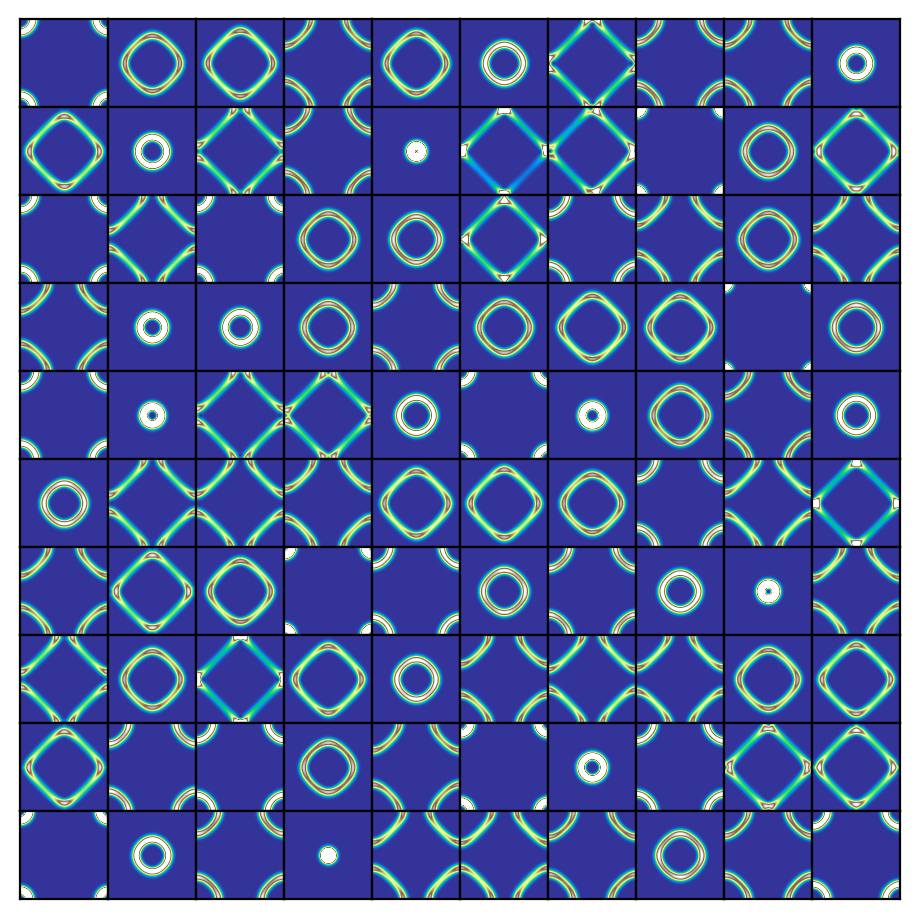

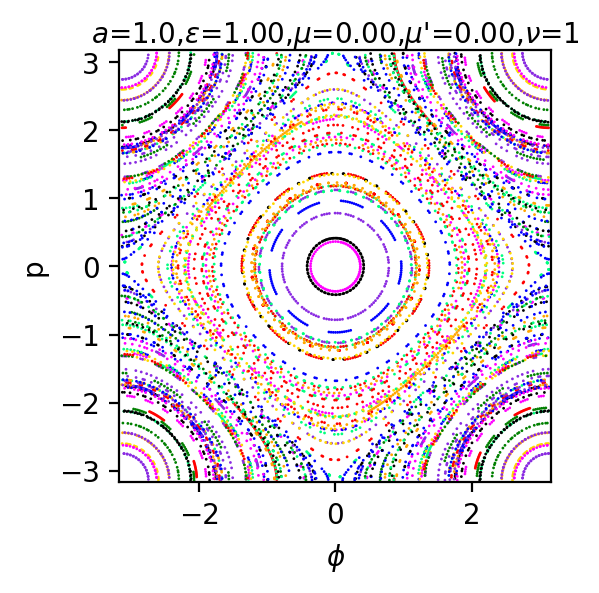

In [108]:
n=100; ntau=400;  nu_fac = 1.0; eps_fac = 1.0; mu_fac = 0.0; mup_fac=0.0
# class computes propagator and Husimi distn
sim1 = Hsys(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac,c_matrix_100)
sim1.circ()
sim1.Hus('')
sim1.classical('')

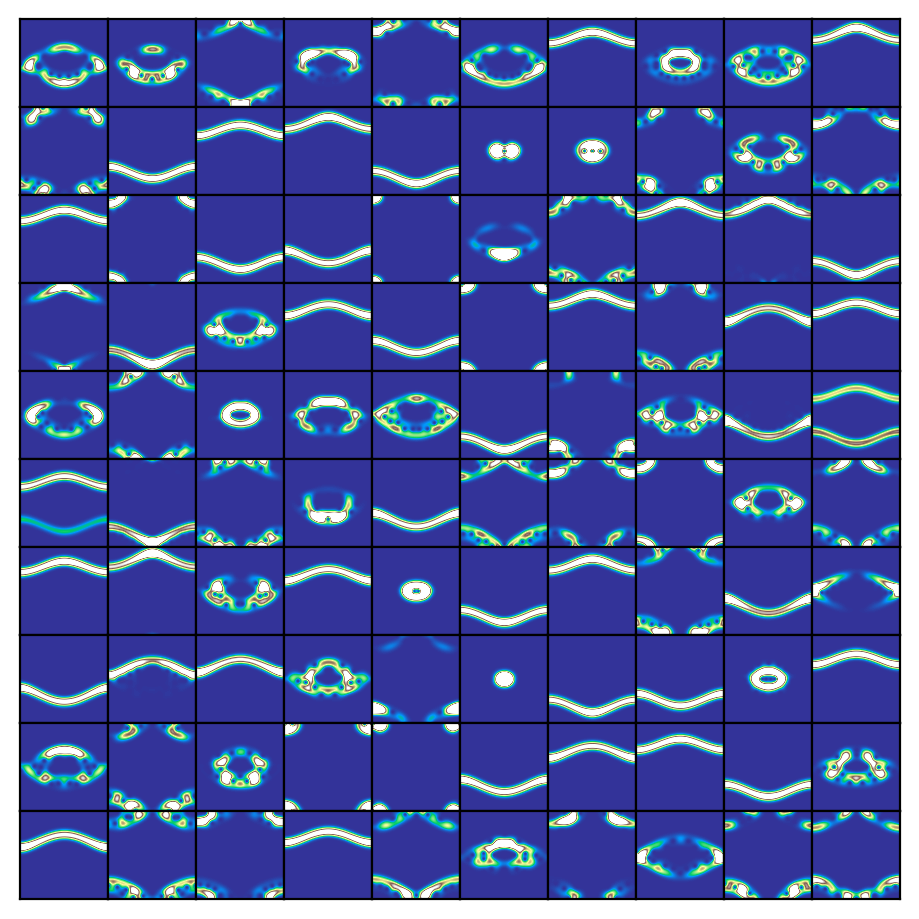

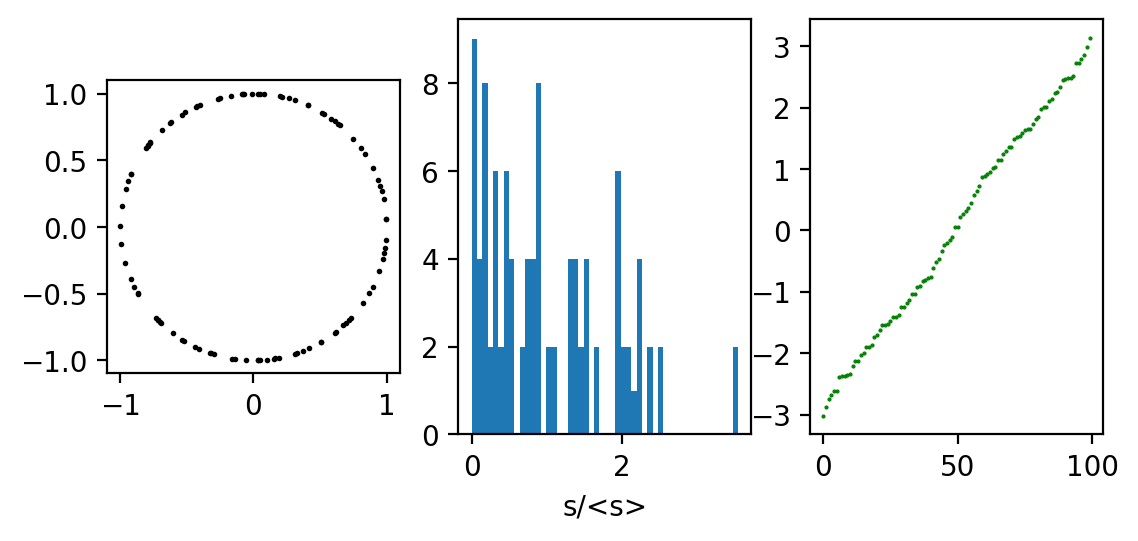

In [109]:
n=100; ntau=600; nu_fac = 0.3; eps_fac = 0.3; mu_fac = 0.1; mup_fac=0.0
sim2= Hsys(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac,c_matrix_100)  
sim2.Hus('')
sim2.classical('')
sim2.circ()

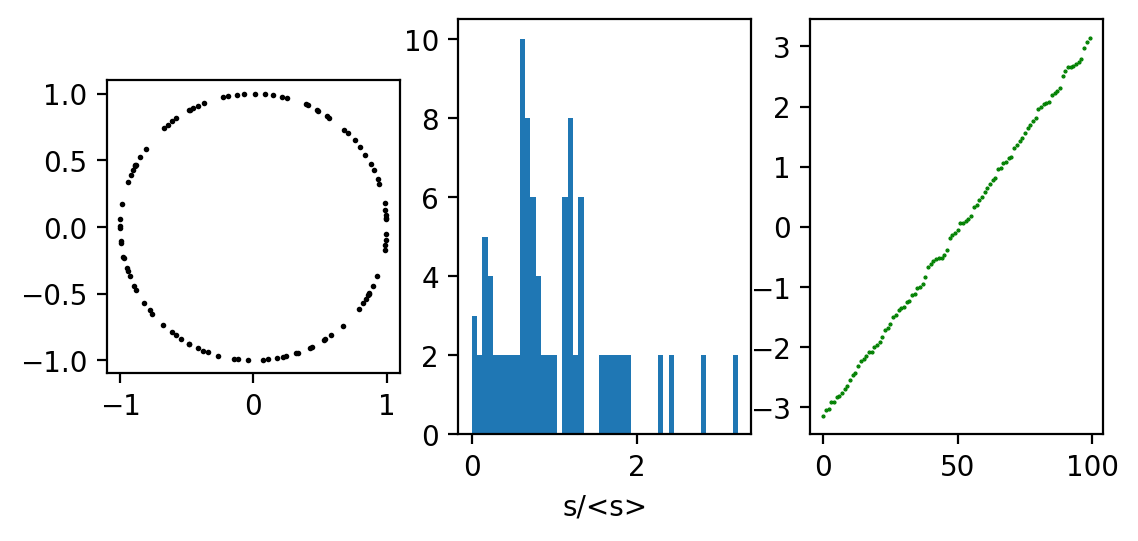

In [85]:
n=100; ntau=500; nu_fac = 0.1; eps_fac = 1.1; mu_fac = 0.3; mup_fac=0.0
sim3= Hsys(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac,c_matrix_100)  # compute the propagator 
sim3.Hus('')
sim3.classical('')
sim3.circ()

0.010302324617439641
0.010965308693471204
0.03313169135069932


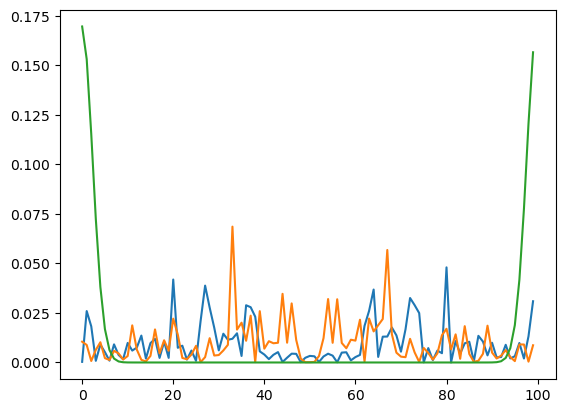

In [100]:
for j in range(3,6):
    pj = get_probs(sim3.vr,j)
    plt.plot(pj)
    print(np.std(pj))

In [95]:
pj

array([6.99963531e-04, 1.58268559e-03, 2.58379672e-03, 1.66014187e-03,
       5.82816019e-03, 3.59006854e-03, 4.03783046e-04, 4.63822102e-04,
       1.95874629e-04, 5.09317687e-03, 1.59053573e-02, 1.77054557e-02,
       2.46139557e-03, 1.28050804e-02, 7.06459096e-03, 3.05080041e-02,
       9.76917125e-03, 4.85697091e-03, 1.16045822e-02, 1.65554631e-02,
       1.65637600e-02, 1.19219608e-02, 9.96697903e-03, 3.89382849e-03,
       4.93014638e-03, 1.64186102e-02, 8.02799319e-03, 2.26018363e-03,
       2.91877790e-03, 3.12727838e-02, 8.42499150e-03, 5.62165681e-03,
       2.43940422e-02, 4.84717114e-03, 9.54169383e-04, 9.44893632e-03,
       1.41828003e-02, 2.89523250e-02, 1.51794434e-02, 1.43243297e-02,
       4.24594008e-03, 1.08846314e-02, 3.45760093e-02, 3.52606307e-03,
       1.97349440e-02, 2.49219098e-02, 3.37370036e-03, 1.12601500e-02,
       1.98834564e-03, 1.73273304e-05, 2.19643975e-04, 8.74108084e-05,
       1.76644435e-03, 1.20217709e-02, 4.83600380e-03, 1.92561046e-02,
      

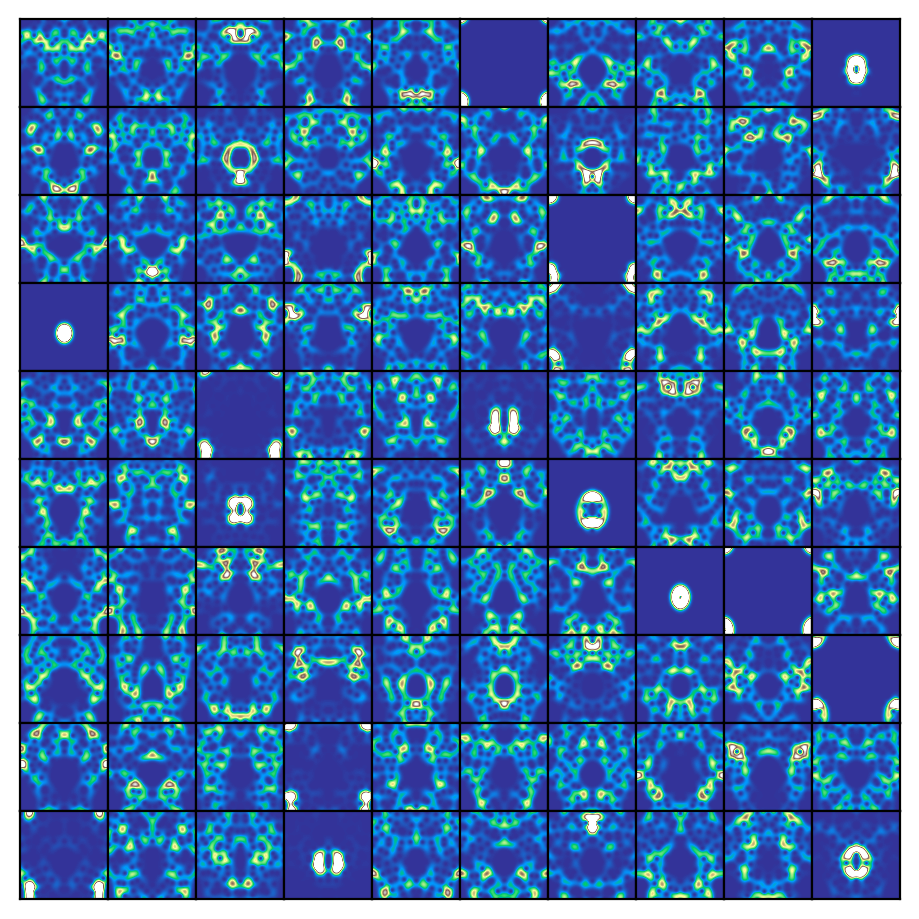

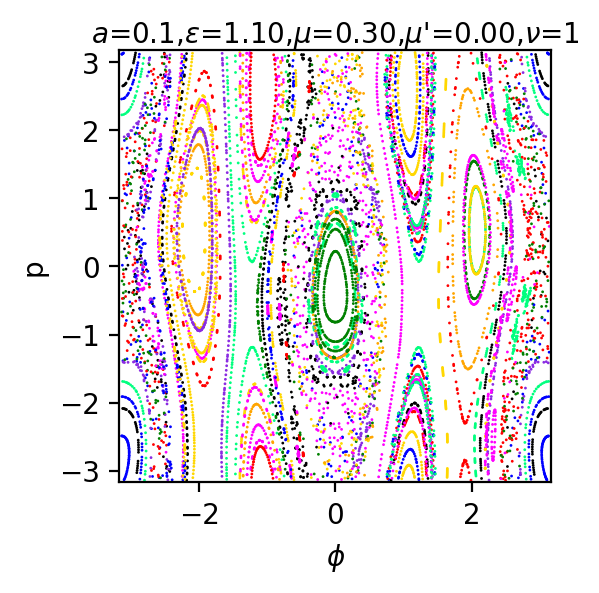

In [86]:
n=100; ntau=1000; nu_fac = 0.1; eps_fac = 1.1; mu_fac = 0.3; mup_fac=0.0
sim4= Hsys(n,ntau,nu_fac,eps_fac,mu_fac,mup_fac,c_matrix_100)  
sim4.Hus('')
sim4.classical('')
sim4.circ()

In [111]:
60*60*27

97200